<a href="https://colab.research.google.com/github/vitoraugusto1993/ml-projects/blob/main/XGBoost/Classification/Diabetes%20Detection/XGBoost_Diabetes_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **XGBoost to Solve Classification Machine Learning Problems**

## **TASK 1: Understand the problem statement and business case**

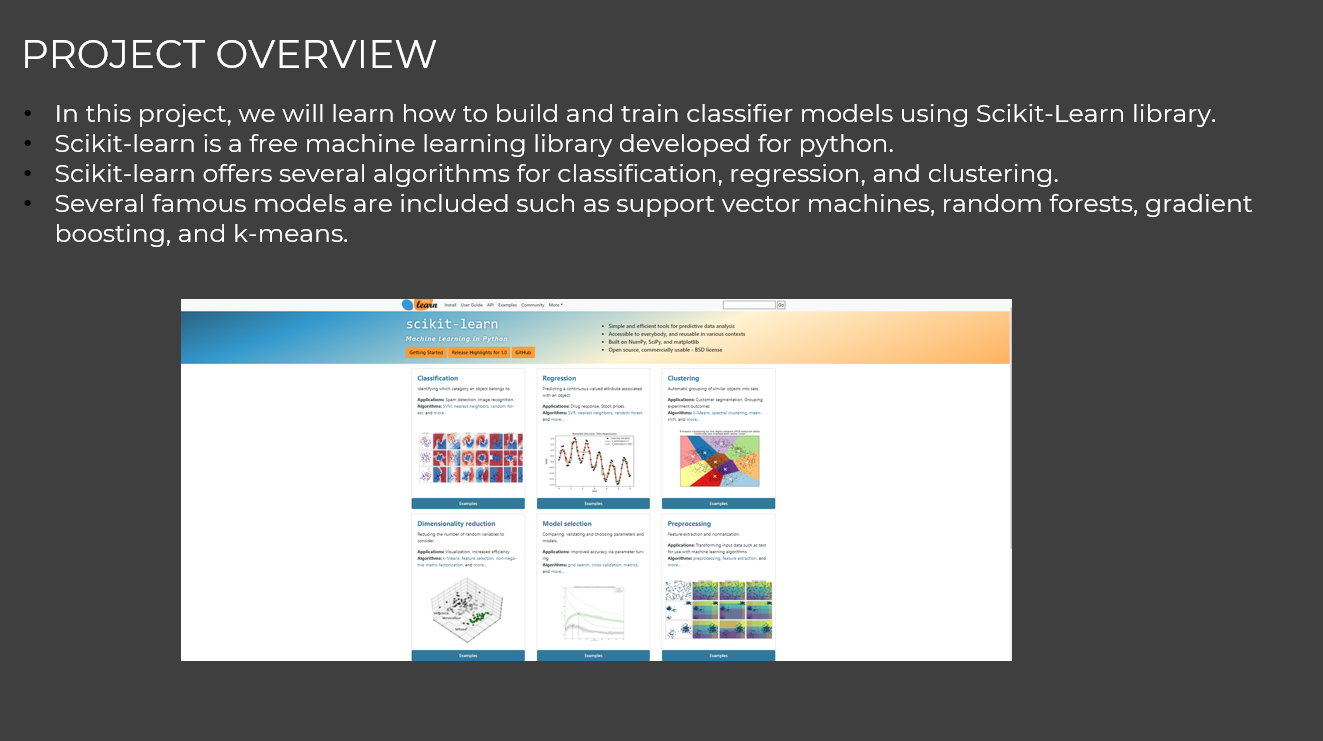

## **TASK 2: Import key libraries and datasets**

In [ ]:
pip install wget

In [ ]:
import wget

URL = "https://files.pythonhosted.org/packages/8a/08/9dee6dfd7f2aad6c30282d55c8f495b4dc1e4747b4e2bdbeb80572ddf312/jupyterthemes-0.20.0-py2.py3-none-any.whl"
wget.download(URL, "jupyterthemes-0.20.0-py2.py3-none-any.whl")

In [ ]:
pip install jupyterthemes-0.20.0-py2.py3-none-any.whl

In [ ]:
pip install xgboost

In [6]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [127]:
# read the csv file
df = pd.read_csv("diabetes.csv", sep=",")

In [128]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- **Display the last 5 rows in the df DataFrame**

In [129]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## **TASK 3: Perform Exploratory Data Analysis**

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [131]:
# Drop id
df["Outcome"].unique()

array([1, 0])

In [132]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# Statistical summary of the dataframe
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


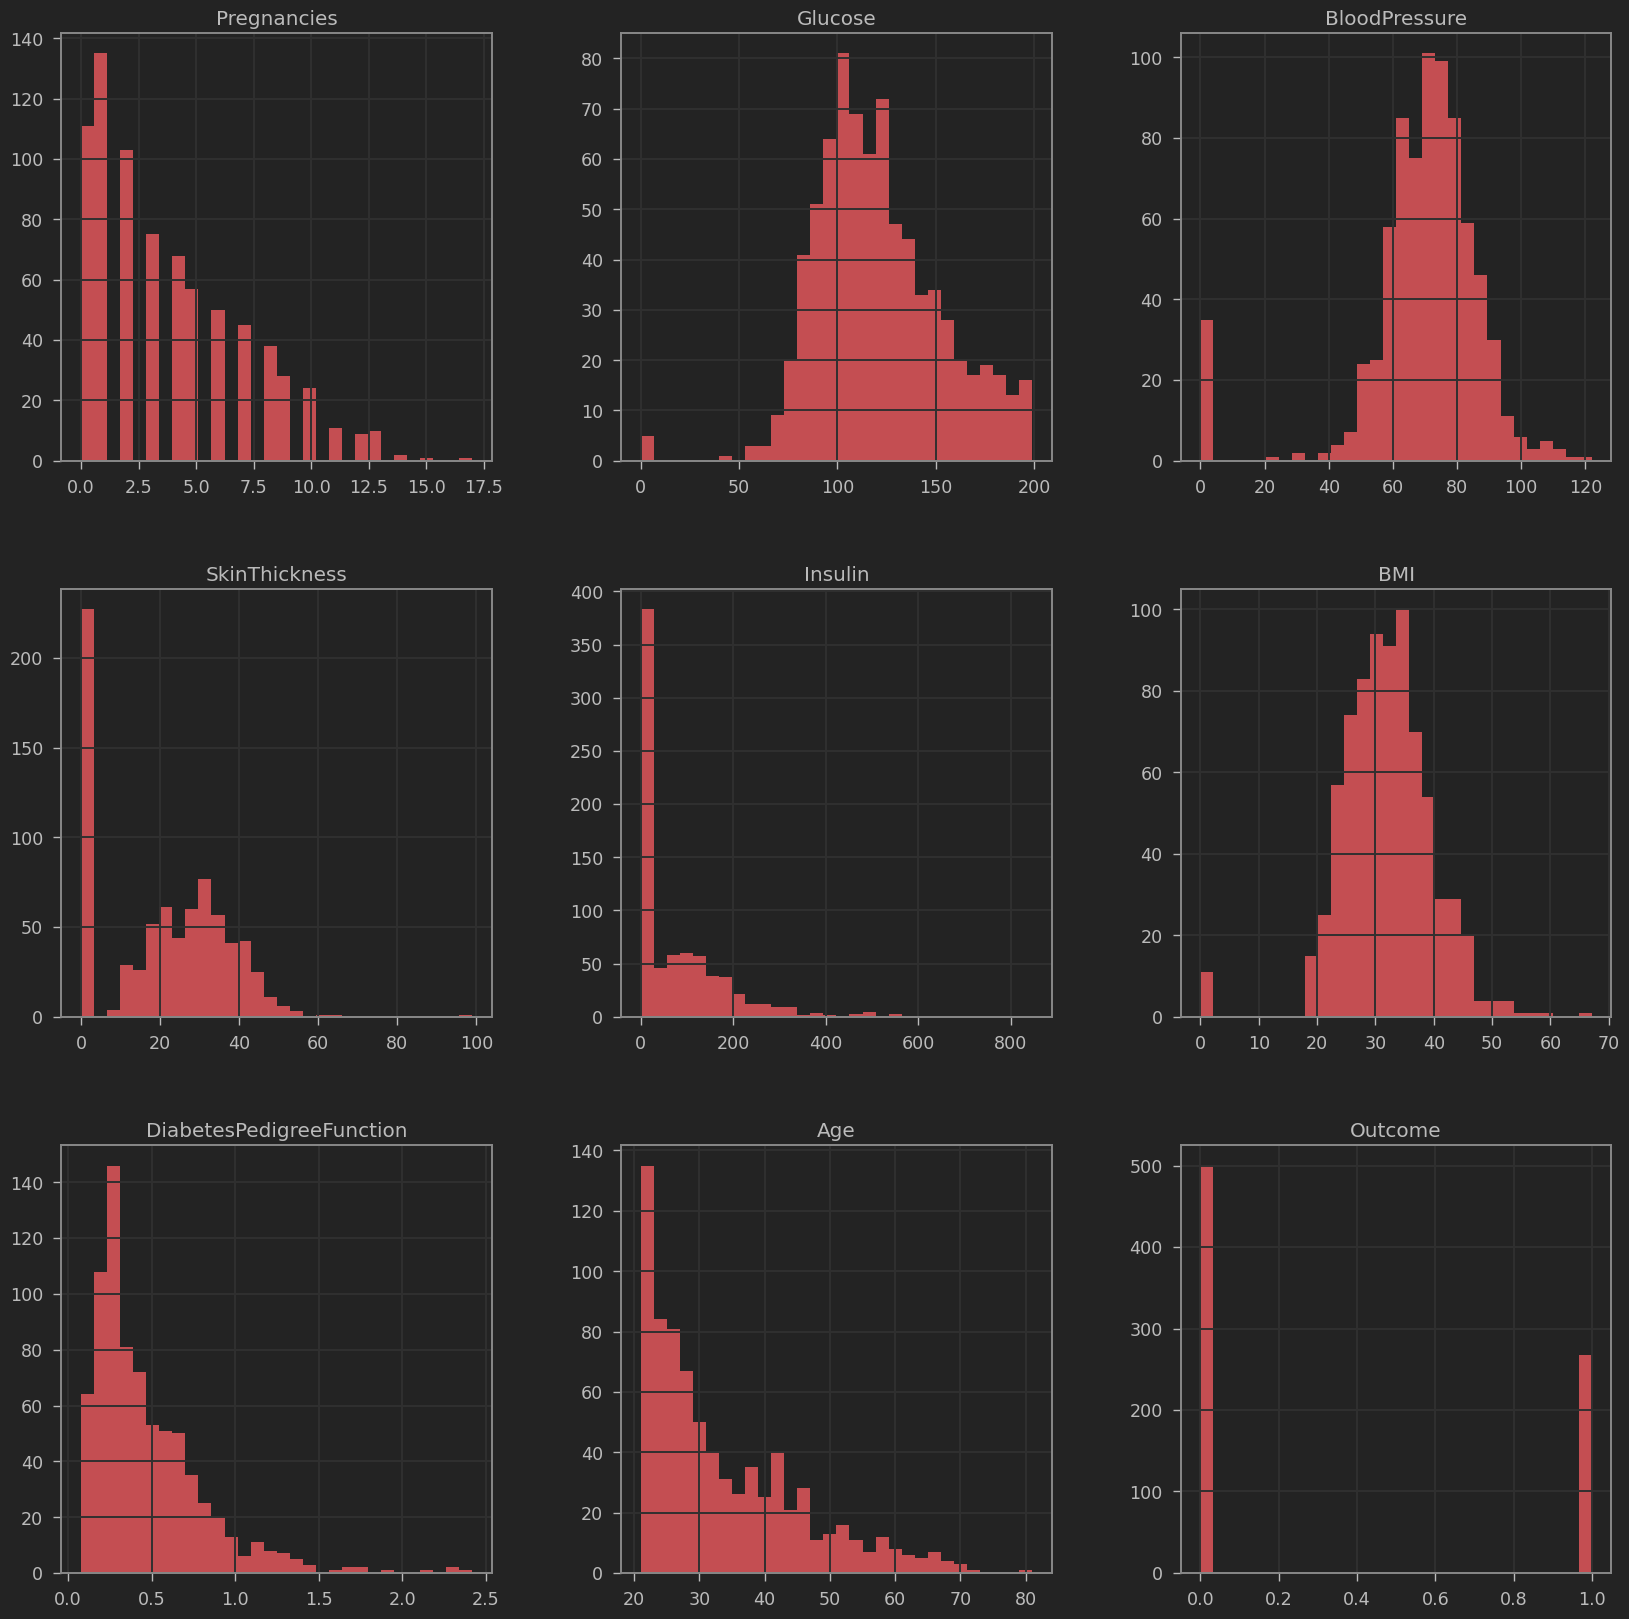

In [133]:
df.hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()

In [134]:
# get the correlation matrix
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


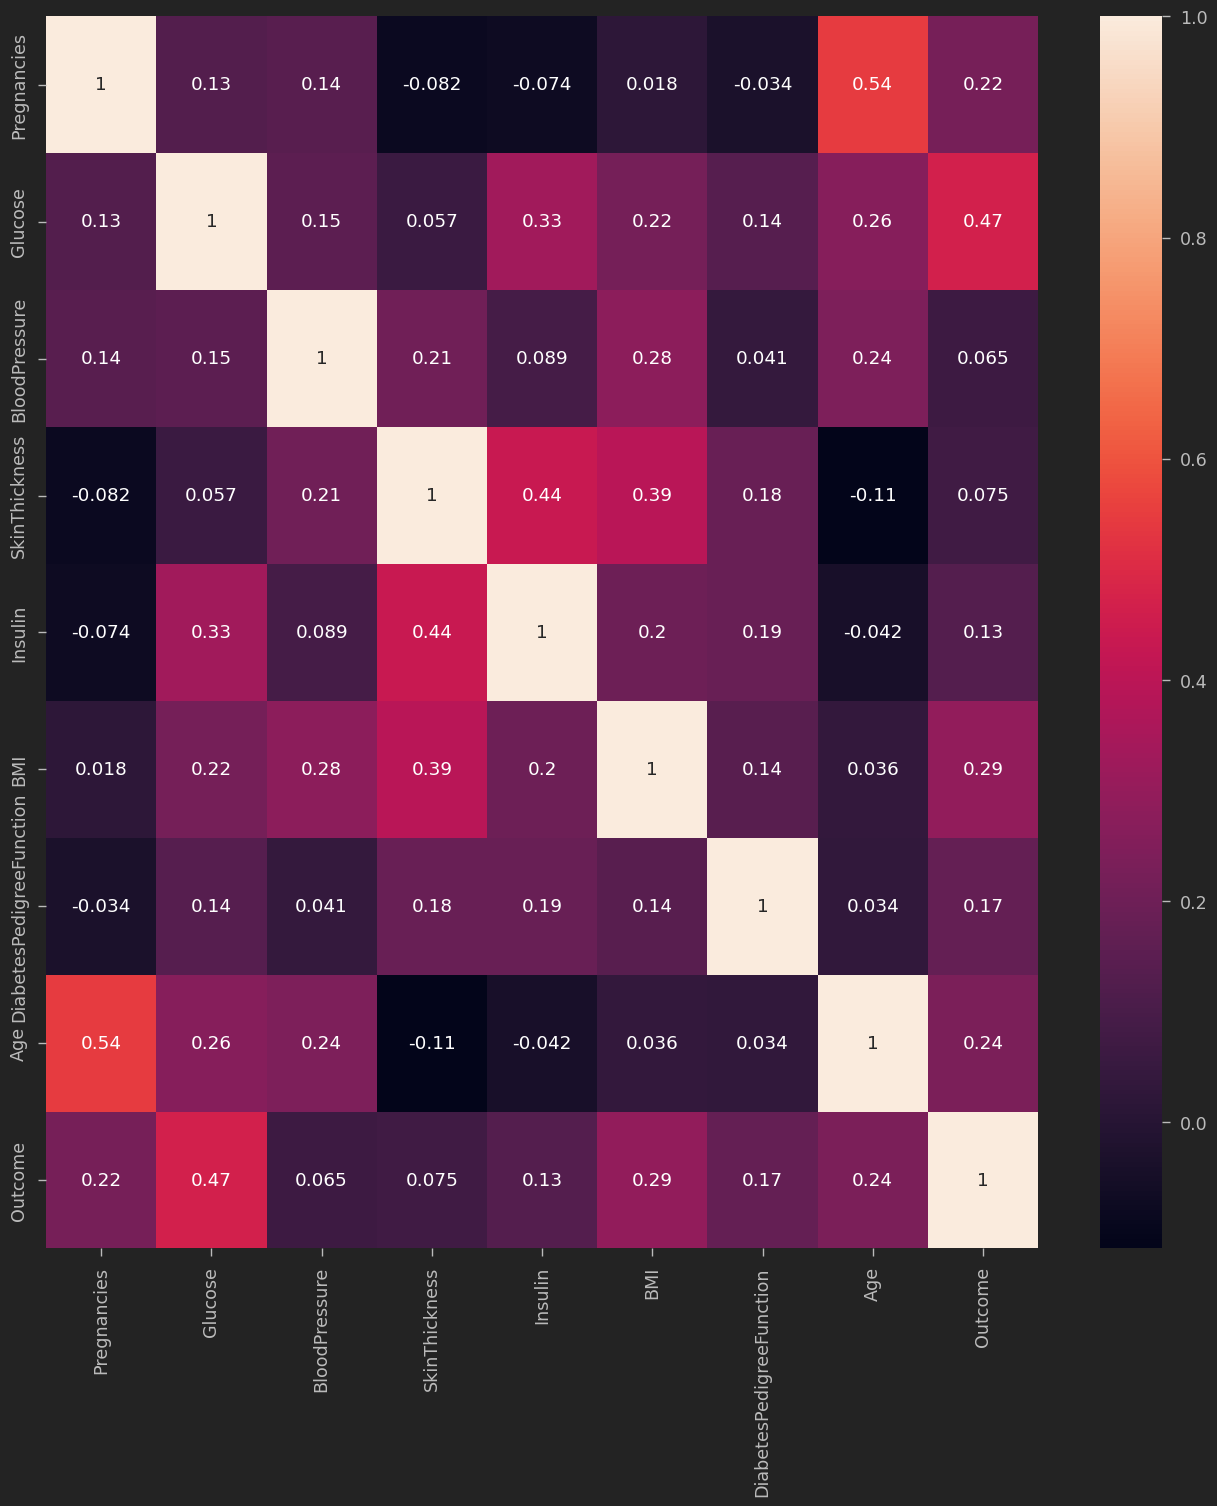

In [135]:
# plotting the correlation matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

## **TASK 4: Create Training and Testing Dataset**

In [137]:
# split the dataframe into target and features
y = df['Outcome']
X = df.drop(columns =['Outcome'])

In [138]:
X = np.array(X).astype(np.float32)
Y = np.array(y).astype(np.float32)

In [139]:
X.shape

(768, 8)

In [140]:
y.shape

(768,)

In [141]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [142]:
X_train.shape

(614, 8)

In [143]:
y_train.shape

(614,)

In [144]:
X_test.shape

(154, 8)

In [145]:
y_test.shape

(154,)

## **TASK 5: Understand XGBoost Algorithm to Solve Classification Type Problems**

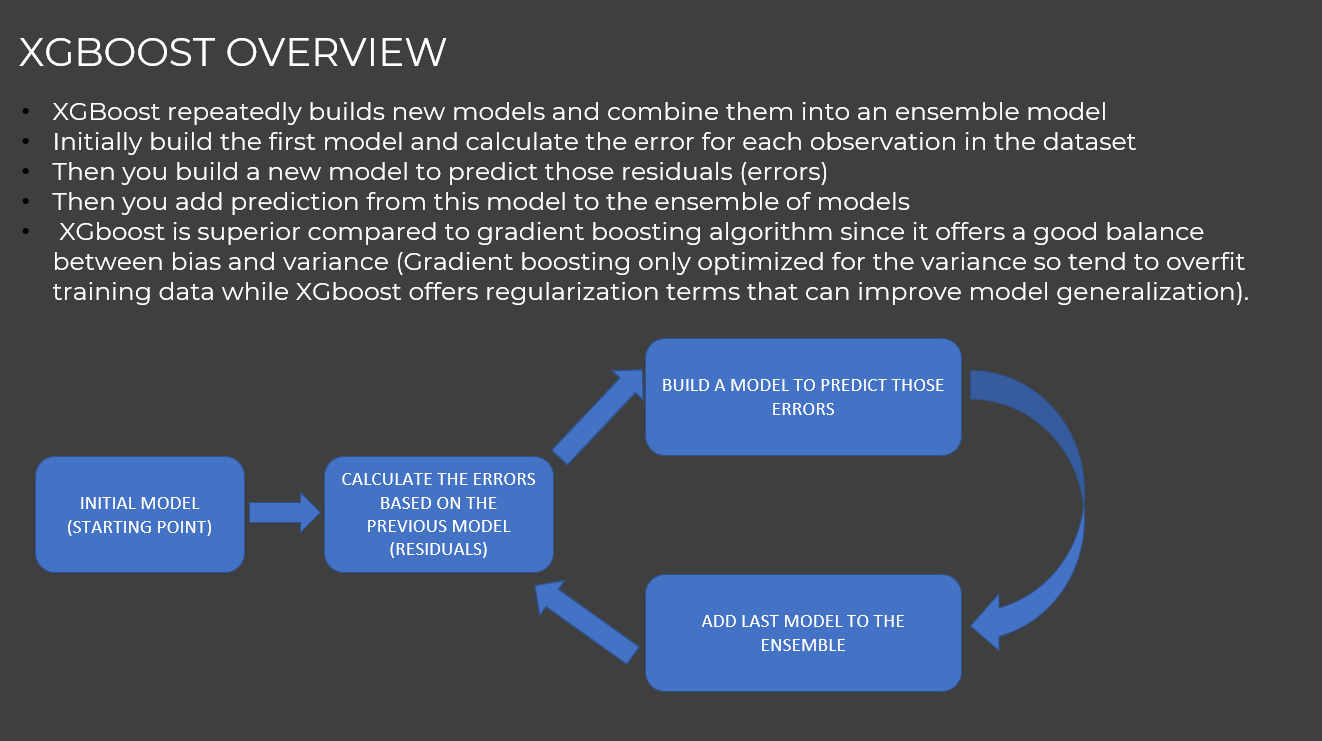

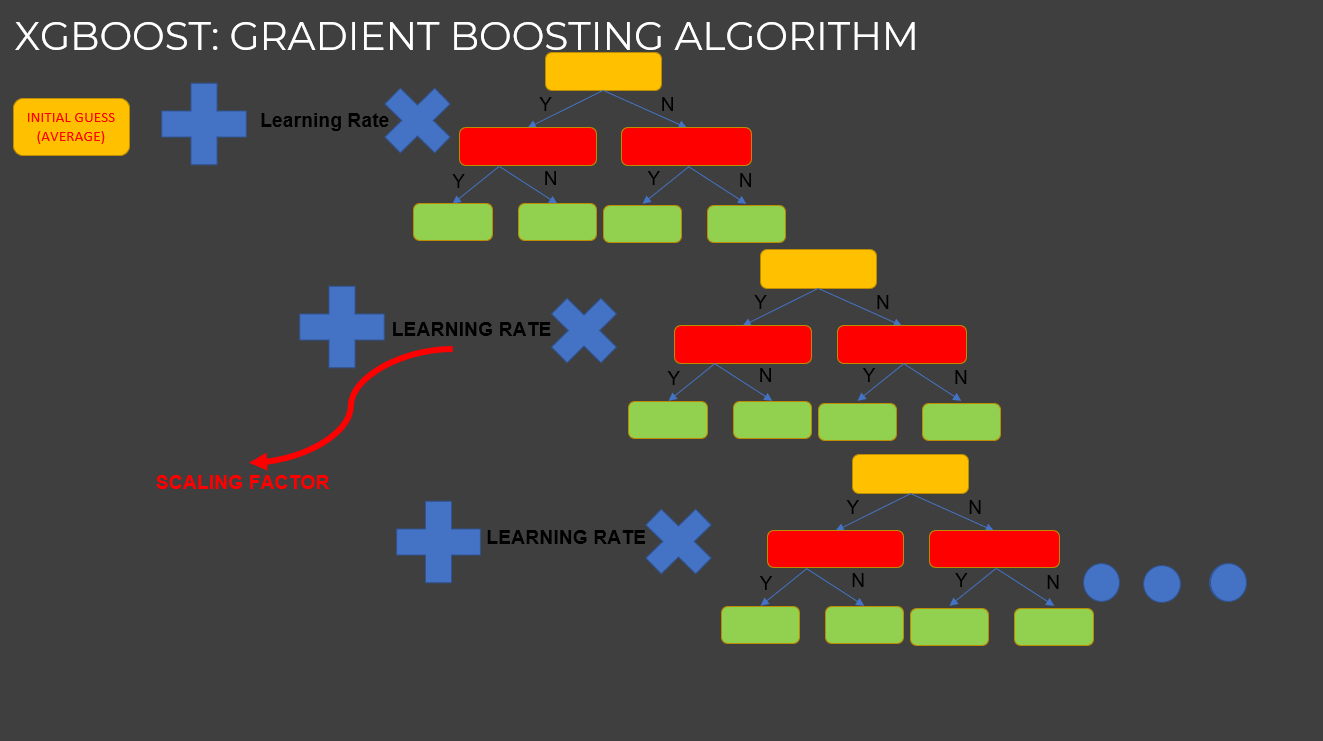

## **TASK 6: Train an XGBoost Classifier in SKLearn**

In [216]:
from xgboost import XGBRFClassifier

In [201]:
# Train an XGBoost classifier model

xgb_classifier = XGBClassifier(objective ='binary:logistic', eval_metric = 'error',
                               learning_rate = 0.2, max_depth = 2, n_estimators = 100)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## **TASK 7: Test XGBoost Classifier to Perform Inference**

In [202]:
# predict the score of the trained model using the testing dataset
result = xgb_classifier.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.7662337662337663


In [203]:
# make predictions on the test data
y_predict = xgb_classifier.predict(X_test)

In [204]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0.


              precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.68      0.63      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



<Axes: >

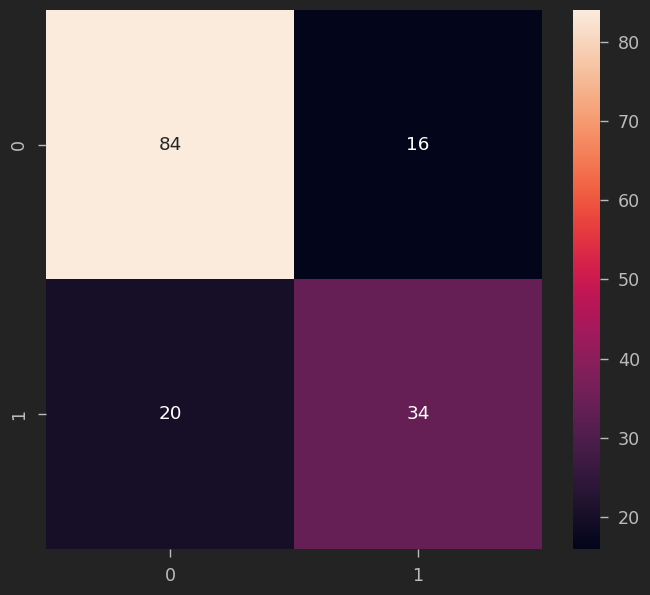

In [205]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)